In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('train.csv')  # opening the dataframe
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data = df.values
x = data[:,1:] # contains all pixel columns
y = data[:,0]  # contains the labels i.e the no corresponding 
print(y)
print(x)


[1 0 1 ... 7 6 9]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
# spliting in training and test data

split = int(0.8 * x.shape[0])

x_train = x[:split,:]
x_test = x[split:,:]

y_train = y[:split]
y_test = y[split:]
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(33600, 784) (8400, 784)
(33600,) (8400,)


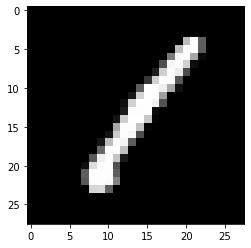

1


In [33]:
# to visualize 
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawImg(x_train[0]) 
print(y_train[0])

In [34]:
# knn algo

def distance(x1,x2,):
    return np.sqrt(sum((x1-x2)**2))   # x1 and x2 =[a,b]

def knn(x,y,query,k=5):   # query is the test case
    
    vals = []
    for i in range(x.shape[0]):  # query and x[i] has 785 columns
        d = distance(query,x[i])
        vals.append((d,y[i]))   # vals = [(d0,0),(d1,1)........]
        
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1], return_counts = True)   # use 0 and 1 to segregate ==> o/p = [0,1],[no of occurence of 0, of 1]
    
    index = new_vals[1].argmax() # getting the index of the highest no from the second array(the counts) ==> that occured most  
    pred = new_vals[0][index]    # slicing the first array of the two to get the value or class of the most occured class
    
    
    return pred

4.0


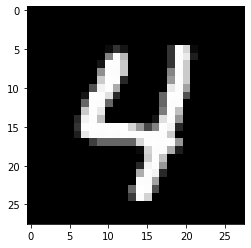

In [41]:
pred = knn(x_train,y_train,x_test[29]) # x_train ==>[[a,b,...],[]....]  y_train ==> [a,b.......], x_test ==> the one to be predicted
print(pred)
drawImg(x_test[29])